In [1]:
import pandas as pd

# Load data (update the filename as needed)
df = pd.read_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\togo-dapaong_qc.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [3]:
df.isnull().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [4]:
missing = df.isnull().sum() / len(df)
print(missing[missing > 0.05])


Comments    1.0
dtype: float64


In [5]:
from scipy.stats import zscore

outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']  # adjust if necessary
zscores = df[outlier_cols].apply(zscore)
outlier_mask = (zscores.abs() > 3).any(axis=1)
print("Rows with outliers:", outlier_mask.sum())


Rows with outliers: 9251


In [6]:
df_clean = df[~outlier_mask].copy()
for col in outlier_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [8]:
df_clean.to_csv(r'C:\Users\Robel\OneDrive\solar-challenge-week0\data\data\togo-dapaong_qc.csv', index=False)


c:\Users\Robel\OneDrive\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


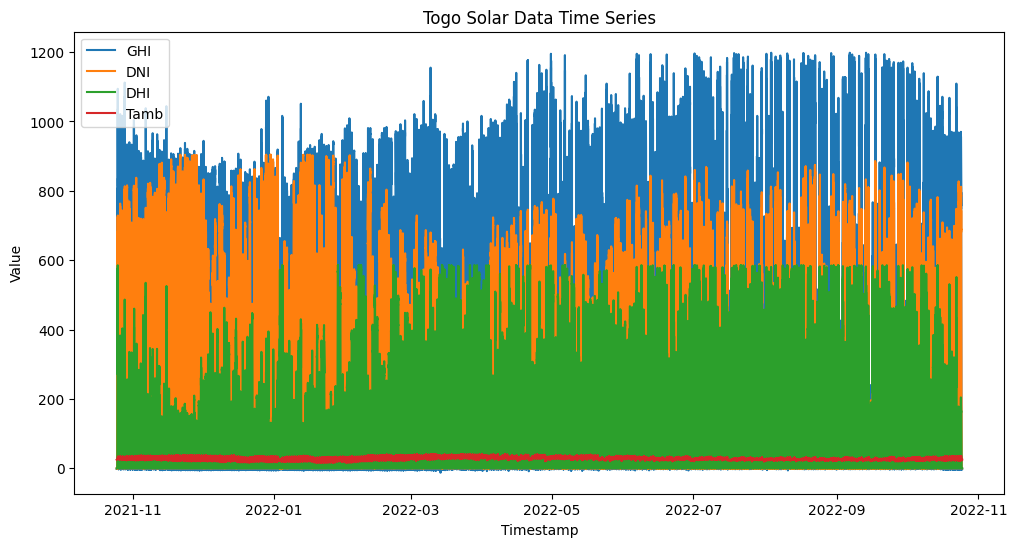

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['GHI'], label='GHI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['DNI'], label='DNI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['DHI'], label='DHI')
plt.plot(pd.to_datetime(df_clean['Timestamp']), df_clean['Tamb'], label='Tamb')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Togo Solar Data Time Series')
plt.show()


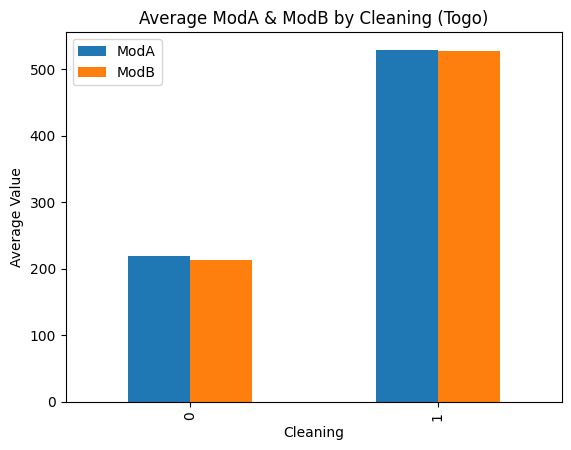

In [10]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot.bar()
plt.title('Average ModA & ModB by Cleaning (Togo)')
plt.xlabel('Cleaning')
plt.ylabel('Average Value')
plt.show()


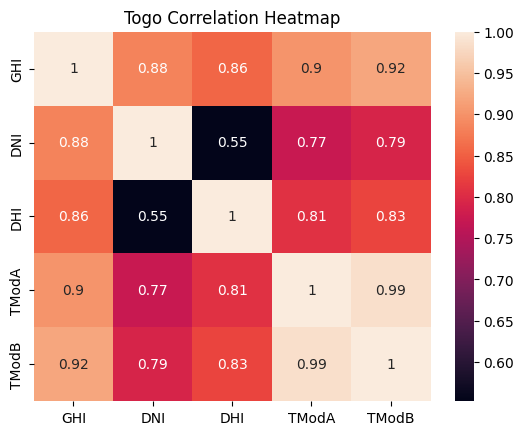

In [11]:
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True)
plt.title('Togo Correlation Heatmap')
plt.show()


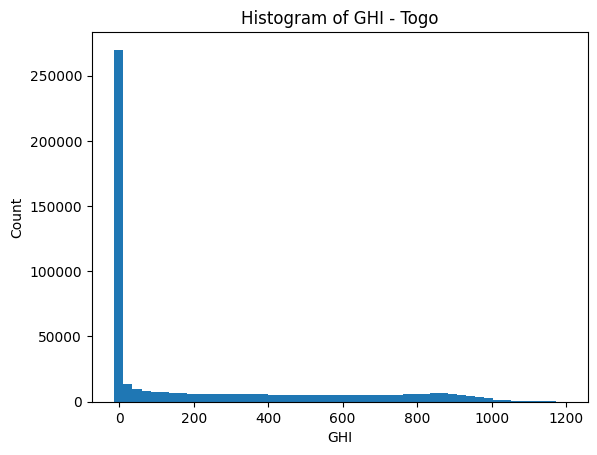

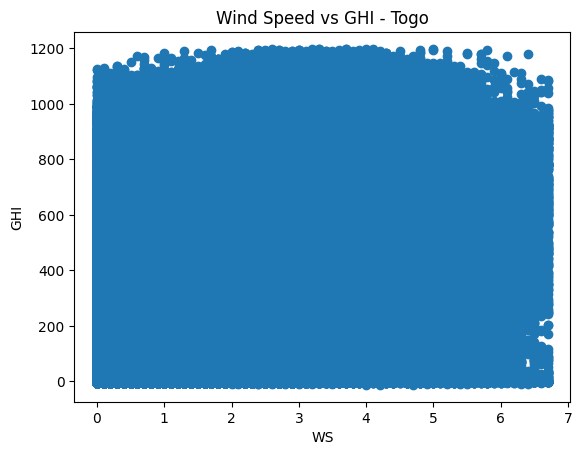

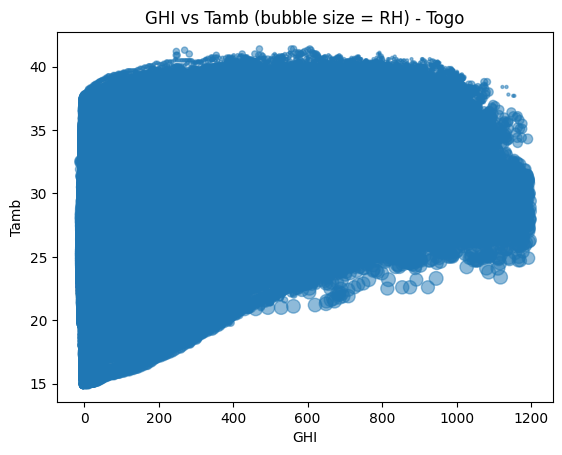

In [12]:
plt.hist(df_clean['GHI'], bins=50)
plt.xlabel('GHI')
plt.ylabel('Count')
plt.title('Histogram of GHI - Togo')
plt.show()

plt.scatter(df_clean['WS'], df_clean['GHI'])
plt.xlabel('WS')
plt.ylabel('GHI')
plt.title('Wind Speed vs GHI - Togo')
plt.show()

plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (bubble size = RH) - Togo')
plt.show()


In [ ]:
Summary for Togo
- Data cleaned, major columns profiled and explored visually.
- Ready for comparison and ranking against other regions.
